## EDA and Visualizations

**Name**: Diane Lu

**Contact**: dianengalu@gmail.com

**Date**: 07/31/2023

### Table of Contents 

1. [Introduction](#intro)
2. [Business Dataset](#business)
    * Data Dictionary
    * Restaurant Ratings Distribution
    * Top 10 Cities 
    * Top 10 Restaurant Categories
3. [Review Dataset](#review)
    * Data Dictionary
4. [User Dataset](#user)
    * Data Dictionary

### Introduction <a class="anchor" id="intro"></a>

Exploratory Data Analysis (EDA) plays a vital role in our project as it allows us to gain valuable insights, recognize patterns, and uncover trends within the dataset. By utilizing visualizations and statistical techniques, we thoroughly explore the data, enabling us to extract meaningful and useful information that will inform our decision-making process throughout the recommendation system development.

#### Importing Python Libraries 

Importing necessary libraries for the EDA process.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style to 'white' for improved aesthetics
sns.set_style("white")

# Import the 'warnings' module to ignore warning messages
import warnings

# Ignore all warning messages to reduce clutter during execution
warnings.filterwarnings("ignore")

### Business Data Exploratory Analysis <a class="anchor" id="business"></a>

**Overview**:

Through data exploration and visualization, we uncover valuable insights about various businesses, their locations, categories, and customer reviews. By examining the data from different angles, we gain a deeper understanding of business trends, customer preferences, and potential opportunities.

**Data Dictionary:**
* `business_id`: unique business id
* `restaurant_name`: the restaurant's name
* `address`: the full address of the restaurant
* `city`: the city
* `state`: 2 character state code
* `postal_code`: the postal code
* `latitude`: latitude of the restaurant
* `longitude`: longitude of the restaurant
* `restaurant_rating`: star rating
* `review_count`: number of reviews
* `is_open`: 0 or 1 for closed or open
* `categories`: business categories

In [4]:
# Load the pickled DataFrame
business_data = pd.read_pickle('T:/GitHub/Brainstation_Capstone/Data/business_data.pkl')

In [5]:
# Display concise information about the 'business_data' DataFrame
business_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50764 entries, 0 to 160584
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   business_id              50764 non-null  object 
 1   restaurant_name          50764 non-null  object 
 2   address                  50764 non-null  object 
 3   city                     50764 non-null  object 
 4   state                    50764 non-null  object 
 5   postal_code              50764 non-null  object 
 6   latitude                 50764 non-null  float64
 7   longitude                50764 non-null  float64
 8   restaurant_rating        50764 non-null  float64
 9   restaurant_review_count  50764 non-null  int64  
 10  is_open                  50764 non-null  int64  
 11  categories               50764 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 5.0+ MB


In [6]:
# Display the first few rows of the 'business_data' DataFrame
business_data.head()

,business_id,restaurant_name,address,city,state,postal_code,latitude,longitude,restaurant_rating,restaurant_review_count,is_open,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"[Gastropubs, Beer Gardens, Bars, American (Tra..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"[Salad, Soup, Sandwiches, Delis, Cafes, Vegeta..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,[Thai]
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,[Breakfast & Brunch]
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,[Pizza]


In [7]:
# Print the number of unique restaurants in the 'business_data' DataFrame
print(f"The number of unique restaurants in our dataset is {business_data['restaurant_name'].nunique()}.")

The number of unique restaurants in our dataset is 37338.


Transforming `restaurant_rating` from float to int so that we can properly visualize the distribution of restaurant ratings. 

In [8]:
# Round the 'restaurant_rating' column in the 'business_data' DataFrame to the nearest integer
rounded_restaurant_rating = round(business_data['restaurant_rating'] + 0.01)

In [9]:
# Count the occurrences of each rounded restaurant rating in the 'rounded_restaurant_rating' Series
rounded_restaurant_rating.value_counts()

4.0    25990
3.0    12691
5.0     8503
2.0     3400
1.0      180
Name: restaurant_rating, dtype: int64

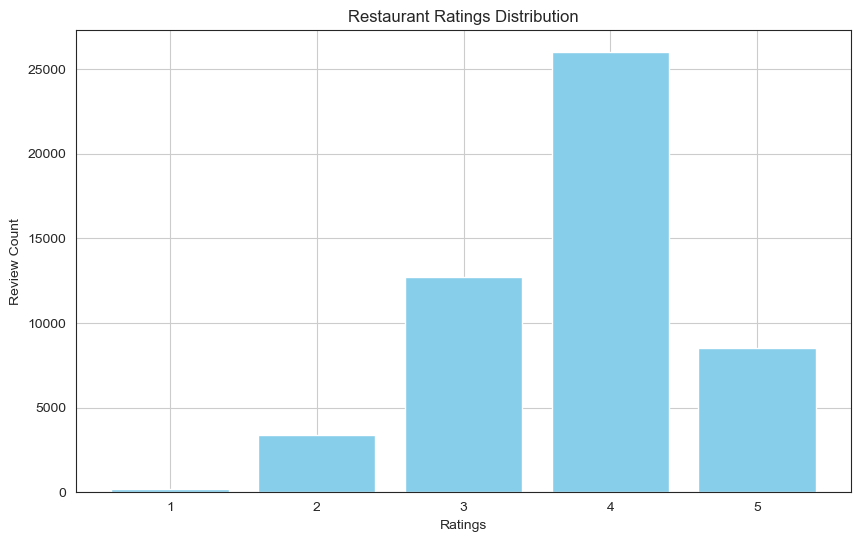

In [10]:
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
review_counts = [180, 3400, 12691, 25990, 8503]

plt.figure(figsize=(10, 6))
plt.bar(ratings, review_counts, color='skyblue')
plt.title('Restaurant Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

**Fig 2.1**: `Restaurant Ratings Distribution` shows the distribution of restaurant ratings based on the number of reviews they received. The x-axis represents the different ratings (ranging from 1.0 to 5.0), and the y-axis shows the corresponding review counts for each rating.

In [11]:
business_data['city'].value_counts()

Portland         5730
Vancouver        5026
Austin           4958
Atlanta          4179
Orlando          3748
                 ... 
Niederwald          1
SURREY              1
CASSELBERRY         1
Miami Beach         1
ChampionsGate       1
Name: city, Length: 459, dtype: int64

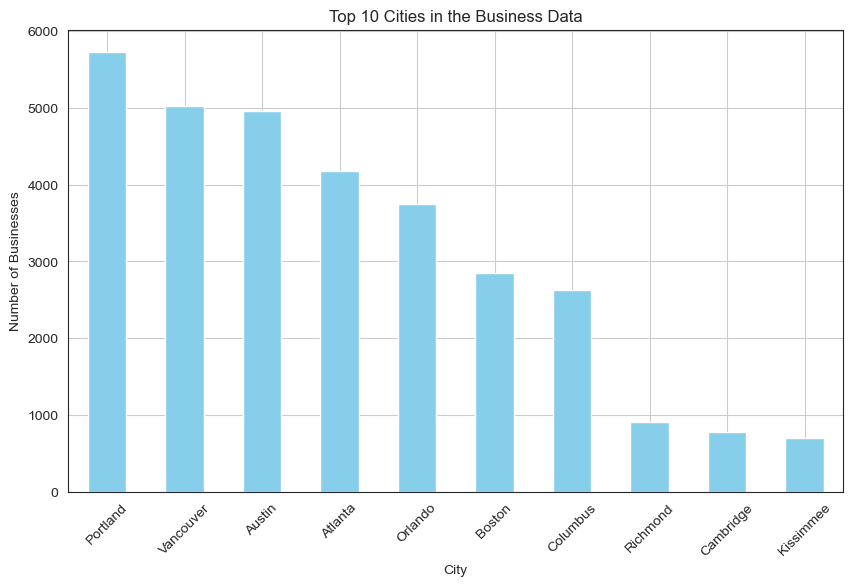

In [12]:
city_counts = business_data['city'].value_counts()
top_20_cities = city_counts.head(10)

plt.figure(figsize=(10, 6))
top_20_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities in the Business Data')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Fig 2.2**: `Top 10 Cities in the Business Data` showcases the top 10 cities based on the number of businesses in the dataset. The `city_counts` variable holds the count of businesses for each city in the dataset, and the `top_20_cities` variable selects the top 10 cities with the highest business counts. 

In [13]:
top_10_categories = business_data['categories'].explode().value_counts().head(10)
top_10_categories

Nightlife                 8550
Bars                      8157
Sandwiches                7272
American (Traditional)    6541
Pizza                     5756
Breakfast & Brunch        5505
American (New)            5458
Fast Food                 5300
Burgers                   4445
Coffee & Tea              4391
Name: categories, dtype: int64

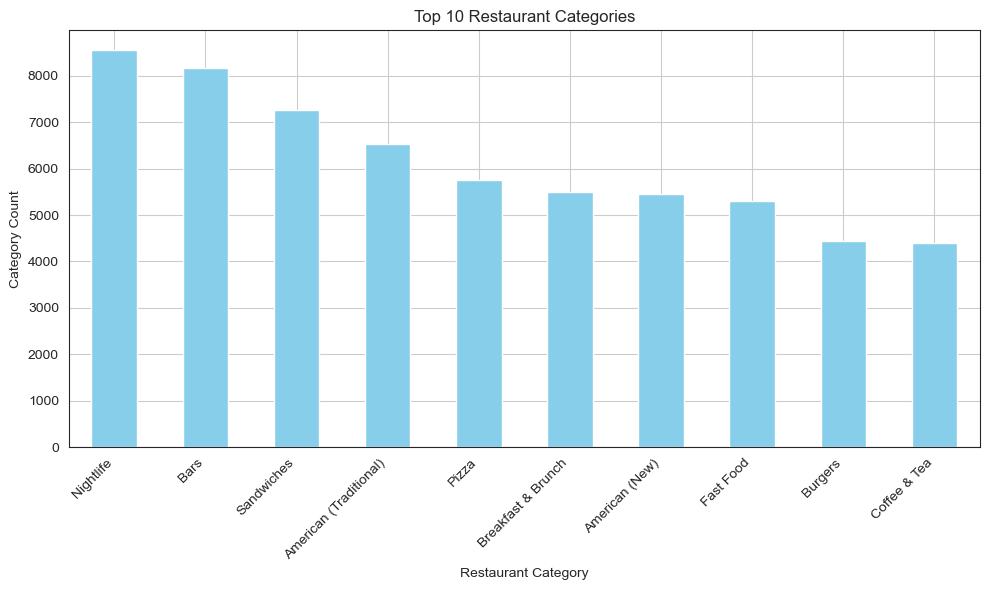

In [14]:
# Plot the bar graph
plt.figure(figsize=(10, 6)) 
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Categories')
plt.xlabel('Restaurant Category')
plt.ylabel('Category Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid(True)
plt.show()

**Fig 2.3**: `Top 10 Restaurant Categories` presents the top 10 restaurant categories based on their occurrence frequency in the dataset. The `top_10_categories` variable holds the count of restaurants for each category, and it selects the top 10 categories with the highest occurrence. The top 10 most reviewed restaurant categories are: `Nightlife`, `Bars`, `Sandwiches`, `American (Traditional)`, `Pizza`, `Breakfast & Brunch`, `American (New)`, `Fast Food`, `Burgers`, `Coffee & Tea`. 

In [15]:
print(f"The number of unique restaurant categories in our dataset is {business_data['categories'].explode().nunique()}.")

The number of unique restaurant categories in our dataset is 724.


In [16]:
print('The top 10 most reviewed restaurants in our dataset are as follows:')

business_data[['restaurant_name', 'city', 'state', 'restaurant_rating', 'restaurant_review_count']].sort_values(by='restaurant_review_count', ascending=False).head(10)

The top 10 most reviewed restaurants in our dataset are as follows:


,restaurant_name,city,state,restaurant_rating,restaurant_review_count
64048,Voodoo Doughnut - Old Town,Portland,OR,3.5,9185
113608,Mike's Pastry,Boston,MA,4.0,7298
42375,Screen Door,Portland,OR,4.5,7219
25571,Pok Pok,Portland,OR,4.0,6221
145385,Neptune Oyster,Boston,MA,4.5,5115
46678,Franklin Barbecue,Austin,TX,4.5,4942
24869,Moonshine Patio Bar & Grill,Austin,TX,4.5,4833
1850,Hopdoddy Burger Bar,Austin,TX,4.0,4708
97776,The Salt Lick BBQ,Driftwood,TX,4.0,4524
122853,Mother’s Bistro & Bar,Portland,OR,4.5,4466


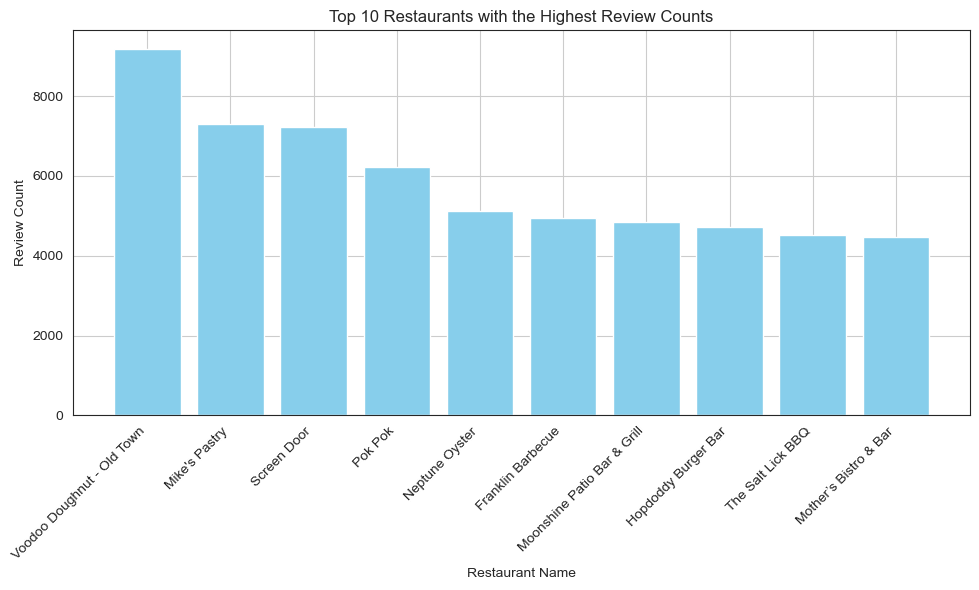

In [17]:
# Set the number of top restaurants you want to display
top_n = 10

# Sort the DataFrame by 'restaurant_review_count' in descending order and select the top N rows
top_n_restaurants = business_data.nlargest(top_n, 'restaurant_review_count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_n_restaurants['restaurant_name'], top_n_restaurants['restaurant_review_count'], color='skyblue')
plt.xlabel('Restaurant Name')
plt.ylabel('Review Count')
plt.title(f'Top {top_n} Restaurants with the Highest Review Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Fig 2.4**: `Top 10 Restaurants with the Highest Review Counts` visualization displays the top 10 restaurants from the given dataset based on their review counts.

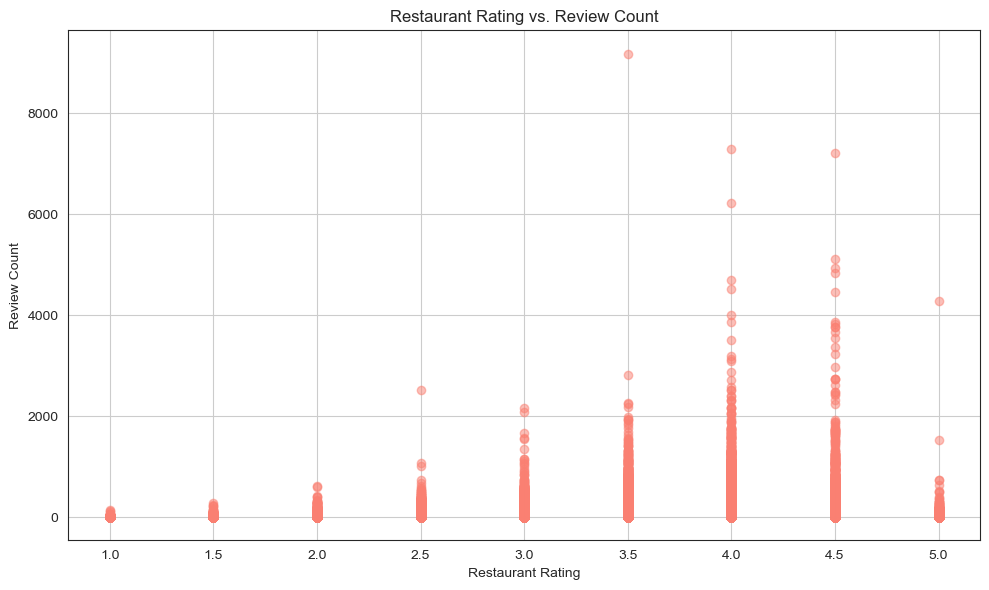

In [18]:
# Scatter Plot for restaurant rating vs. review count
plt.figure(figsize=(10, 6))
plt.scatter(business_data['restaurant_rating'], business_data['restaurant_review_count'], alpha=0.5, color='salmon')
plt.xlabel('Restaurant Rating')
plt.ylabel('Review Count')
plt.title('Restaurant Rating vs. Review Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**Fig 2.5**: `Restaurant Rating vs. Review Count Scatter Plot` visualizes the relationship between 'restaurant_rating' and 'restaurant_review_count' in a dataset containing information about various restaurants. The plot emphasizes that most reviews are positive and tend to be on the higher end. As the rating increases, we observe higher review counts. This relationship provides valuable insights for businesses to assess restaurant performance and customer satisfaction. By analyzing this plot, businesses can identify popular restaurants with high ratings and numerous reviews, helping potential customers make informed dining choices based on public feedback. 

### Review Data Exploratory Analysis <a class="anchor" id="review"></a>

**Data Dictionary:**
* `review_id`: unique review id
* `user_id`: unique user id
* `business_id`: unique user id
* `stars`: star rating
* `text`: the review itself
* `rating_type`: 0 or 1 for negative or positive review 

In [19]:
# Load the pickled DataFrame
review_data = pd.read_pickle('T:/GitHub/Brainstation_Capstone/Data/review_data.pkl')

In [20]:
review_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'text'], dtype='object')

In [21]:
# Print a concise summary of a DataFrame
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8635401 entries, 0 to 8635402
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   text         object 
dtypes: float64(1), object(4)
memory usage: 395.3+ MB


In [22]:
# Displaying the first few rows to get an initial glimpse of the data
review_data.head()

,review_id,user_id,business_id,stars,text
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,Apparently Prides Osteria had a rough summer a...
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,This store is pretty good. Not as great as Wal...
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,I called WVM on the recommendation of a couple...
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,I've stayed at many Marriott and Renaissance M...
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,The food is always great here. The service fro...


In [23]:
print(f"The review dataset has a total of {(review_data.shape)[0]} review entries.")

The review dataset has a total of 8635401 review entries.


In [24]:
review_counts = review_data['stars'].value_counts().sort_values()
review_counts

2.0     711378
3.0     926655
1.0    1262799
4.0    1920037
5.0    3814532
Name: stars, dtype: int64

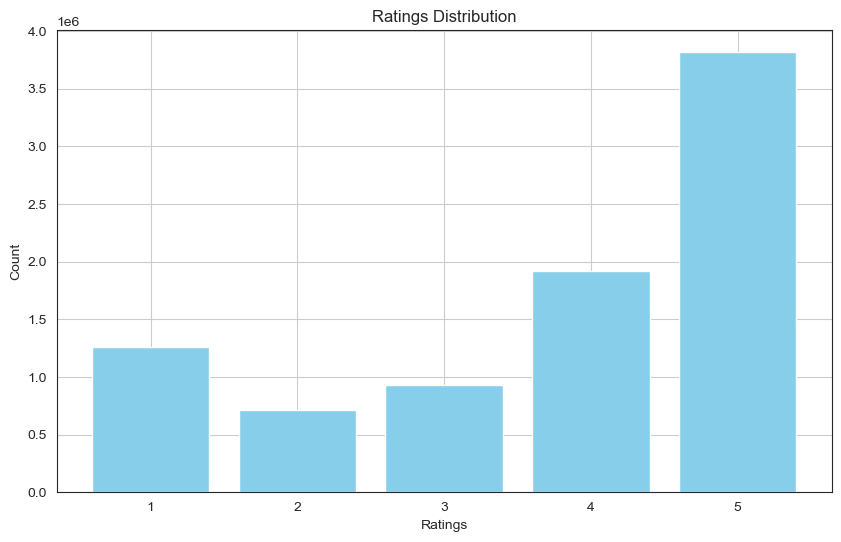

In [25]:
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
review_counts = [1262799, 711378, 926655, 1920037, 3814532]

plt.figure(figsize=(10, 6))
plt.bar(ratings, review_counts, color='skyblue')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Fig 3.1**: `Ratings Distribution` illustrates the distribution of review counts for different restaurant ratings. The chart compares five specific ratings (1.0, 2.0, 3.0, 4.0, and 5.0) on the x-axis with their corresponding review counts on the y-axis. Each bar's height represents the count of reviews received for restaurants with the respective rating. 

**Sentiment Analysis**

In [26]:
review_data['rating_type'] = np.where(review_data['stars'] >= 4, 1, 0)
review_data['rating_type'].value_counts()

1    5734569
0    2900832
Name: rating_type, dtype: int64

In [27]:
# Get a random sample of 1% of the rows from the DataFrame
random_sample = review_data.sample(frac=0.01, random_state=42)

# Display the random sample
display(random_sample)

,review_id,user_id,business_id,stars,text,rating_type
5932453,Is7-0uDV6nDH1fHAOTmw-A,dGUszeSkbVHhPkqgpKBmBA,AyoFLxUrGveYckC5Zj7tDA,3.0,"Not a horrible hotel, but definitely needs an ...",0
493615,1aUO4vSIoKBAW3kEUwutBg,snHMo74cwRi7LFnZEnwCYQ,qDyZQ6mT1JajQ7_Yj7PeLw,4.0,Small place and gets crowded quick but overall...,1
6259232,VLptQ8fM5QraIC7w5dNbBA,z206zAkTprhznyFYq_1tlQ,Go8U9oJd4CfpO1ik4Z8iKA,3.0,"Could be a great spot, but based on one visit ...",0
1489918,4B1XWjBbougk7RdGtDPBbA,5KcOartap5i6_CoC9pf5bA,ZRubp7P36r5dUqyuNLFndg,5.0,"Men's Place is a chill, tasteful environment t...",1
1304179,0zy2y0psMIu1y2tD58RNIg,4jKdRw3wYpn7eUYnqbvNfw,S3aTZhPs9-7O4c6uIt6yiA,5.0,excellent mango bingsoo.\nthis might be the mo...,1
...,...,...,...,...,...,...
4503844,2bWXEksPmfmby-NtDoFTSg,3mRKMdq5DBbTLOUoTLY7CA,zTD-vYOkXrZTZmoabUIKMg,1.0,My previous car spent a lot of time here. Not ...,0
8534390,U_adQGKEtp4TPPg1Vcp7Sg,L3gKNbpy43wVn_QfIPt3rQ,0OLnSNxQeKrxGmWaehy4LQ,1.0,I've been taking my dogs to Woodstock VCA for ...,0
2936330,CqXXKVqh4_zB1LMWRoY40w,syAGtRgmNFhd4wWLpxa0aw,88TlAPCLtzA5oHFVVGSfHg,5.0,This experience far exceeded my expectations. ...,1
8418976,LasP3FmaJmTAFepxDVXdNA,QbIuQLtDY3bXZZNHHd9eKg,TAjYgTIHX_Kl6wfQZAEniA,4.0,I am very satisfied with the product. It was a...,1


Splitting `review_data` based on whether the rating is negative or positive. Star ratings that are 3 or lower will be marked as a negative review, and the remainder of ratings that are 4 or higher will be considered a positive review. 

In [28]:
# Splitting the DataFrame into negative and positive DataFrames
negative = random_sample[random_sample['rating_type'] == 0]
positive = random_sample[random_sample['rating_type'] == 1]

# Dropping the 'rating_type' column from both DataFrames
negative = negative.drop('rating_type', axis=1)
positive = positive.drop('rating_type', axis=1)

In [29]:
# Displaying the first few rows to get an initial glimpse of the data
negative.head()

,review_id,user_id,business_id,stars,text
5932453,Is7-0uDV6nDH1fHAOTmw-A,dGUszeSkbVHhPkqgpKBmBA,AyoFLxUrGveYckC5Zj7tDA,3.0,"Not a horrible hotel, but definitely needs an ..."
6259232,VLptQ8fM5QraIC7w5dNbBA,z206zAkTprhznyFYq_1tlQ,Go8U9oJd4CfpO1ik4Z8iKA,3.0,"Could be a great spot, but based on one visit ..."
6274992,stu_Oztl_w-ARQgUboGs1g,tCAMFOyUIV9Ltc88ZzBeZw,SAAHL_pL7fFxeogJIVLQBQ,2.0,When we arrived the hotel was overbooked. We c...
7823880,DvVodqfBTfcKBzz_2SbZlg,nVkYhIH0vi63Pua0ab2j8g,8HHjwYYxm_GZcDQOB95CNQ,3.0,"Good selection but super expensive! \n\nThis ""..."
7438030,ykE-9AjoD309g7BYtIOn6g,A_PWwxYtPnQn8vCe4YSEjQ,9Su325kUCQ1ZglXS-G_7ZA,3.0,I've been here twice now and it has a pretty g...


In [30]:
# Displaying the first few rows to get an initial glimpse of the data
positive.head()

,review_id,user_id,business_id,stars,text
493615,1aUO4vSIoKBAW3kEUwutBg,snHMo74cwRi7LFnZEnwCYQ,qDyZQ6mT1JajQ7_Yj7PeLw,4.0,Small place and gets crowded quick but overall...
1489918,4B1XWjBbougk7RdGtDPBbA,5KcOartap5i6_CoC9pf5bA,ZRubp7P36r5dUqyuNLFndg,5.0,"Men's Place is a chill, tasteful environment t..."
1304179,0zy2y0psMIu1y2tD58RNIg,4jKdRw3wYpn7eUYnqbvNfw,S3aTZhPs9-7O4c6uIt6yiA,5.0,excellent mango bingsoo.\nthis might be the mo...
7903109,DkU1fmg-Ml9ynKOs1djOig,tz3FeJiWavlx6N9sMjIsXA,1U66rBiZ-VHMkbgylDF0Sw,4.0,"We were staying with friends, we needed dinner..."
3309241,BKErBOXKYjmoV0cwL513ZA,CyzpdlVkE-TL0OemYPWQyw,d9a-UvsOMLUTDwIHj1OtzA,5.0,First time at Mario's was great; the inspectio...


By building a tokenizer, we can process our review text data. The `tokenizer` will remove punctuation, set to lowercase, split into words, and remove blanks and stop word. 

In [31]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

ENGLISH_STOP_WORDS = stopwords.words('english')
stemmer = PorterStemmer() 

def tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

**Count Vectorizer Method**

Tokenizing our `negative` reviews dataframe. 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag-of-words representation 
negative_vec = CountVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(negative['text'])
negative_transformed = negative_vec.transform(negative['text'])

# Display the sparse matrix with the bag-of-words representation
negative_features = pd.DataFrame(columns=negative_vec.get_feature_names_out(), data=negative_transformed.toarray())
display(negative_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\n4,\n\na,\n\nafter,\n\nagain,\n\nall,...,yr,yuck,yum,yummi,zero,zip,zone,zoo,zucchini,‍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tokenizing our `positive` reviews dataframe. 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag-of-words representation 
positive_vec = CountVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(positive['text'])
positive_transformed = positive_vec.transform(positive['text'])

# Display the sparse matrix with the bag-of-words representation
positive_features = pd.DataFrame(columns=positive_vec.get_feature_names_out(), data=positive_transformed.toarray())
display(negative_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\n4,\n\na,\n\nafter,\n\nagain,\n\nall,...,yr,yuck,yum,yummi,zero,zip,zone,zoo,zucchini,‍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plotting the top 20 **negative** tokens. 

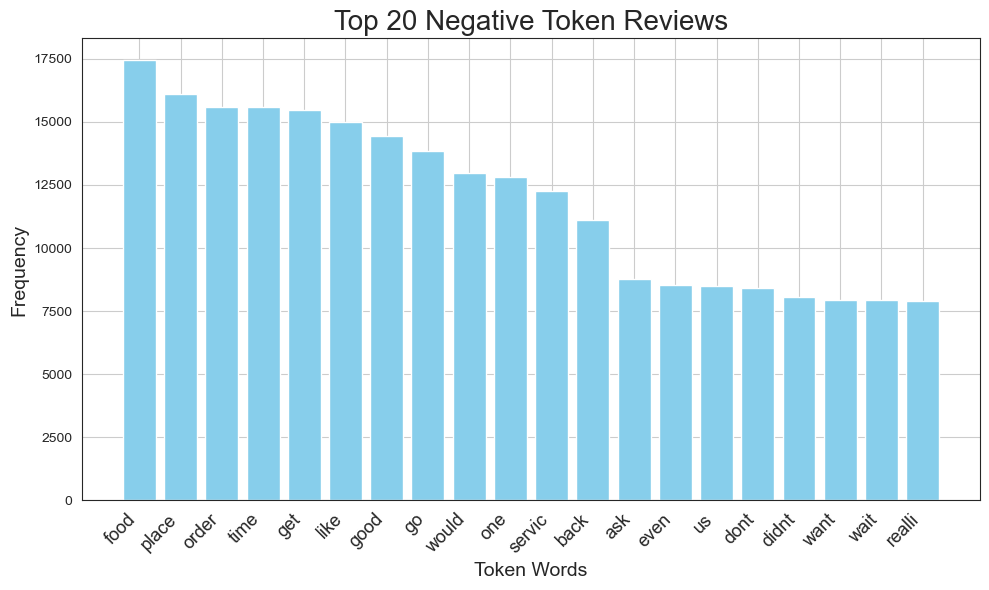

In [34]:
# Sum the one hot encoded values for each token to get its frequency
negative_token_frequencies = negative_features.sum()

# Get the top 20 token words and their frequencies for plotting
top_20_tokens = negative_token_frequencies.nlargest(20)
token_words = top_20_tokens.index
frequencies = top_20_tokens.values

# Create the bar graph for the top 20 tokens
plt.figure(figsize=(10, 6))
plt.bar(token_words, frequencies, color='skyblue')
plt.title('Top 20 Negative Token Reviews', fontsize=20)
plt.xlabel('Token Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13) 
plt.tight_layout()
plt.grid(True)
plt.show()

**Fig 3.2**: `Top 20 Negative Token Reviews` displays the top 20 most frequently occurring token words in a set of negative reviews. By visualizing the most common token words, this graph allows quick identification of the primary issues or complaints expressed in the negative reviews. Businesses can use this information to address recurring problems and improve their products or services to enhance customer satisfaction. The bar graph provides an easily understandable overview of the key areas that need attention, helping businesses make data-driven decisions to better meet their customers' needs.

Plotting the top 20 **positive** tokens. 

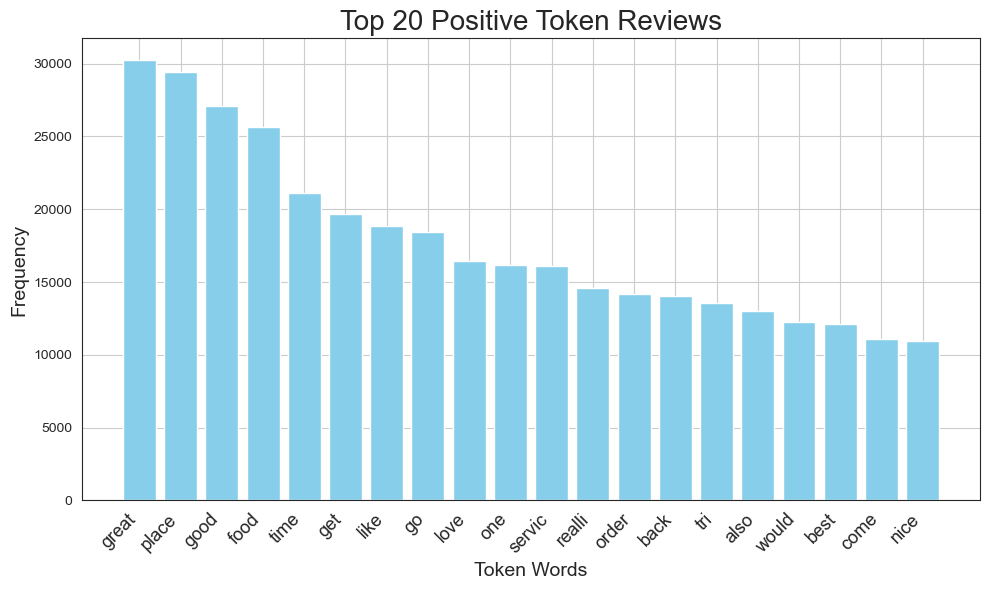

In [35]:
# Sum the one hot encoded values for each token to get its frequency
positive_token_frequencies = positive_features.sum()

# Get the top 20 token words and their frequencies for plotting
top_20_tokens = positive_token_frequencies.nlargest(20)
token_words = top_20_tokens.index
frequencies = top_20_tokens.values

# Create the bar graph for the top 20 tokens
plt.figure(figsize=(10, 6))
plt.bar(token_words, frequencies, color='skyblue')
plt.title('Top 20 Positive Token Reviews', fontsize=20)  
plt.xlabel('Token Words', fontsize=14)  
plt.ylabel('Frequency', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=13) 
plt.tight_layout()
plt.grid(True)
plt.show()

**Fig 3.3**: `Top 20 Positive Token Reviews` displays the top 20 most frequently occurring token words in a set of positive reviews. By visualizing the most common token words, this graph allows quick identification of the primary issues or complaints expressed in the positive reviews. The bar graph provides an easily understandable overview of the key areas that need attention, helping businesses make data-driven decisions to better meet their customers' needs.

### User Data Exploratory Analysis <a class="anchor" id="user"></a>

**Data Dictionary:**
* `user_id`: unique user id
* `user_name`: the user's first name
* `average_stars`: average rating of all reviews

In [36]:
# Load the pickled DataFrame
user_data = pd.read_pickle('T:/GitHub/Brainstation_Capstone/Data/user_data.pkl')

In [37]:
# Print a concise summary of a DataFrame
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189451 entries, 0 to 2189456
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   user_id            object 
 1   name               object 
 2   user_review_count  int64  
 3   average_stars      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.5+ MB


In [38]:
# Displaying the first few rows to get an initial glimpse of the data
user_data.head()

,user_id,name,user_review_count,average_stars
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,3.85
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,4.09
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,3.76
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,3.77
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,3.72


In [39]:
print(f"The user dataset has a total of {user_data['user_id'].nunique()} unique user entries.")

The user dataset has a total of 2189451 unique user entries.


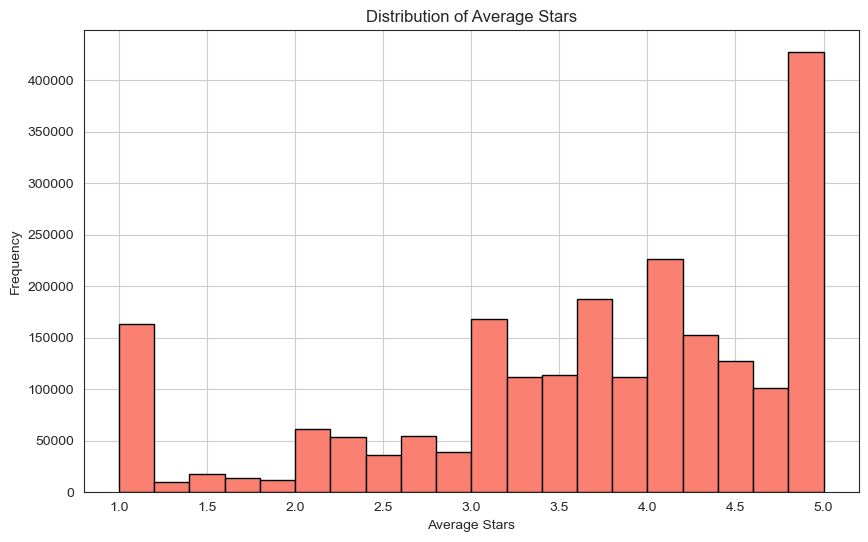

In [40]:
# Histogram for 'average_stars'
plt.figure(figsize=(10, 6))
plt.hist(user_data['average_stars'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stars')
plt.grid(True)
plt.show()

**Fig 4.1**: `Distribution of Average Stars` is a histogram that visualizes the distribution of `average_stars` in a dataset representing user data. It is left-skewed, indicating that higher average star ratings are more common. The histogram showcases a tendency towards 4s and 5s, suggesting users generally rate positively. This visualization provides valuable insights into user preferences and satisfaction levels, enabling businesses to understand common average rating ranges and how users perceive their products or services.

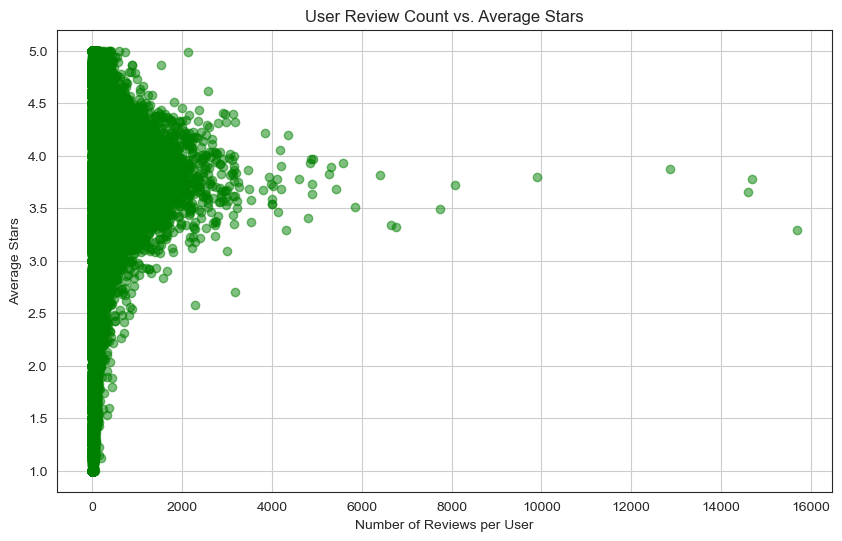

In [41]:
# Scatter Plot for 'user_review_count' vs. 'average_stars'
plt.figure(figsize=(10, 6))
plt.scatter(user_data['user_review_count'], user_data['average_stars'], alpha=0.5, color='green')
plt.xlabel('Number of Reviews per User')
plt.ylabel('Average Stars')
plt.title('User Review Count vs. Average Stars')
plt.grid(True)
plt.show()

**Fig 4.1**: `User Review Count vs. Average Stars` is a scatter plot that visualizes the relationship between the `user_review_count` and `average_stars` in a dataset representing user data. Based on the number of reviews made by users, it's evident that most people do not write a large number of reviews. While there are outliers who have written over 6000 reviews, the majority falls within the 0 to 2000 review range. This plot offers valuable insights for businesses to understand their user base and customize strategies to enhance customer satisfaction based on user engagement and feedback.